<a href="https://colab.research.google.com/github/shauryashah/ML-Lab-Assignments/blob/master/Assignment%204/ML_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, DBSCAN, OPTICS, cluster_optics_dbscan
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn_extra.cluster import KMedoids

In [ ]:
def normalize_data(X):
  scaler=MinMaxScaler()
  return pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
def plot_cluster_parition_based(X, model):
  y_kmeans = model.fit_predict(X)
  print(model.cluster_centers_) #display cluster centers
  plt.scatter(X.to_numpy()[y_kmeans   == 0, 0], X.to_numpy()[y_kmeans == 0, 1],s = 100, c = 'red', label = 'class_0')
  plt.scatter(X.to_numpy()[y_kmeans   == 1, 0], X.to_numpy()[y_kmeans == 1, 1],s = 100, c = 'blue', label = 'class_1')
  plt.scatter(X.to_numpy()[y_kmeans   == 2, 0], X.to_numpy()[y_kmeans == 2, 1],s = 100, c = 'green', label = 'class_2')   #Visualising the clusters - On the first two columns
  plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')   #plotting the centroids of the clusters
  plt.legend()
  plt.show()

In [ ]:
def evaluation_metrics(X, labels, description='euclidean'):  
  score = silhouette_score(X, labels, metric=description)
  print('Silhouetter Score: %.3f' % score)
  score = calinski_harabasz_score(X, labels)
  print('Calinski Harabasz Score: %.3f' % score)
  score = davies_bouldin_score(X, labels)
  print('Davies Bouldin Score: %.3f' % score)


In [ ]:
def mlRoutine(X):
  X_scaled = normalize_data(X)
  print(X_scaled.head())
  print('--------- KMeans --------------')

  Sum_of_squared_distances = []
  for k in range(1,10):
    km = KMeans(n_clusters=k)
    km = km.fit(X_scaled)
    Sum_of_squared_distances.append(km.inertia_)
  plt.plot(range(1,10), Sum_of_squared_distances, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Sum_of_squared_distances')
  plt.title('Elbow Method For Optimal k')
  plt.show()
  kmeans = KMeans(n_clusters=3, max_iter= 1000, random_state=1)
  plot_cluster_parition_based(X_scaled, kmeans)
  evaluation_metrics(X_scaled, kmeans.labels_)

  print('--------- KMeans++ ------------')
  Sum_of_squared_distances = []
  for k in range(1,10):
    km = KMeans(n_clusters=k, init='k-means++')
    km = km.fit(X_scaled)
    Sum_of_squared_distances.append(km.inertia_)
  plt.plot(range(1,10), Sum_of_squared_distances, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Sum_of_squared_distances')
  plt.title('Elbow Method For Optimal k')
  plt.show()
  kmeans = KMeans(n_clusters=3,init = 'k-means++',   max_iter = 1000, n_init = 10, random_state = 0)
  plot_cluster_parition_based(X_scaled, kmeans)
  evaluation_metrics(X_scaled, kmeans.labels_)

  print('--------- KMedoids ------------')
  models = [
    (
        KMedoids(metric="manhattan", n_clusters=3, 
        init="heuristic", max_iter=1000),"manhattan",
    ),
    (
        KMedoids(metric="euclidean", n_clusters=3,  
        init="heuristic", max_iter=1000),"euclidean",
    ),
    (KMedoids(metric="cosine", n_clusters=3, init="heuristic", 
    max_iter=1000), "cosine", ),
  ]


  Sum_of_squared_distances = []
  for k in range(1,10):
    km = KMedoids(n_clusters=k)
    km = km.fit(X_scaled)
    Sum_of_squared_distances.append(km.inertia_)
  plt.plot(range(1,10), Sum_of_squared_distances, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Sum_of_squared_distances')
  plt.title('Elbow Method For Optimal k')
  plt.show()
  for (model, description) in models:
    print('Metric : ', description)
    plot_cluster_parition_based(X_scaled, model)
    evaluation_metrics(X_scaled, model.labels_)
  
  print('\n--------------Dendrogram-------------')

  distance_matrix = linkage(X_scaled, method = 'ward', metric = 'euclidean')
  plt.figure(figsize=(25, 10))
  dn = dendrogram(distance_matrix)
  max_d=2
  plt.axhline(y=max_d, c='k')
  plt.show()

  sns.clustermap(X_scaled, figsize=(25,10), method='ward', cmap='viridis')
  plt.show()

  print('\n-------------------- AGNES --------------')

  ward = AgglomerativeClustering(n_clusters=3)
  ward_pred = ward.fit_predict(X_scaled)
  print('Linkage: Ward')
  evaluation_metrics(X_scaled, ward_pred)

  complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
  complete_pred = complete.fit_predict(X_scaled)
  print('Linkage: Complete')
  evaluation_metrics(X_scaled, complete_pred)

  avg = AgglomerativeClustering(n_clusters=3, linkage="average")
  avg_pred = avg.fit_predict(X_scaled)
  print('Linkage: Average')
  evaluation_metrics(X_scaled, avg_pred)

  print('\n------------- Birch --------------')
  brc = Birch(n_clusters=3)
  brc.fit(X_scaled)
  labels = brc.labels_
  labels_unique = np.unique(labels)
  n_clusters_ = len(labels_unique)
  print("number of estimated clusters : %d" % n_clusters_)
  print(brc.subcluster_centers_)
  evaluation_metrics(X_scaled, labels)
  plt.scatter(X_scaled.to_numpy()[:,0], X_scaled.to_numpy()[:,1], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')

  print('\n------------ DBSCAN -----------------')
  dbscan = DBSCAN(eps=0.5, min_samples=5)
  dbscan.fit(X_scaled)
  labels = dbscan.labels_

  # Creating a numpy array with all values set to false by default
  core_samples_mask = np.zeros_like(labels, dtype=bool)
  # Setting core and border points (all points that are not -1) to True
  core_samples_mask[dbscan.core_sample_indices_] = True

  # Finding the number of clusters in labels (ignoring noise if present)
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)

  # Printing the number of clusters and number of noise points (outliers)
  print('Estimated number of clusters: %d' % n_clusters_)
  print('Estimated number of noise points: %d' % n_noise_)

  evaluation_metrics(X_scaled, labels)

  #display clusters
  unique_labels = set(labels)
  colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
  for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = 'k'
    class_member_mask = (labels == k)
    xy = X_scaled.to_numpy()[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
    markeredgecolor='k', markersize=10)
    xy = X_scaled.to_numpy()[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
    markeredgecolor='k', markersize=5)
  plt.title('Estimated number of clusters: %d' % n_clusters_)
  plt.show()

  print('\n------------------ OPTICS --------------')
  optics_model= OPTICS(min_samples=7, xi=.07, min_cluster_size=.035, cluster_method='xi', metric='minkowski', algorithm = 'auto')
  # Training the model
  optics_model.fit(X_scaled)
  labels = optics_model.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)
  # Printing the number of clusters and number of noise points (outliers)
  print('Estimated number of clusters: %d' % n_clusters_)
  print('Estimated number of noise points: %d' % n_noise_)

  evaluation_metrics(X_scaled, labels)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
3           0.083333          0.458333           0.084746          0.041667
4           0.194444          0.666667           0.067797          0.041667
--------- KMeans --------------


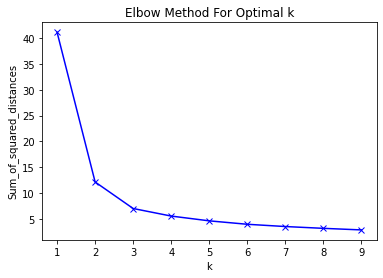

[[0.70726496 0.4508547  0.79704476 0.82478632]
 [0.19611111 0.595      0.07830508 0.06083333]
 [0.44125683 0.30737705 0.57571548 0.54918033]]


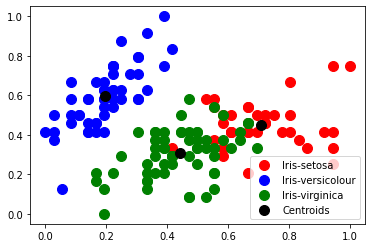

Silhouetter Score: 0.505
Calinski Harabasz Score: 359.845
Davies Bouldin Score: 0.760
--------- KMeans++ ------------


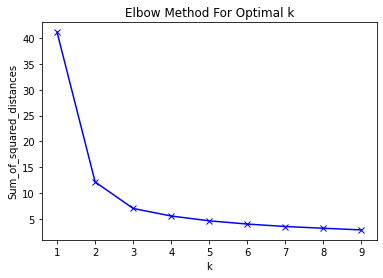

[[0.70726496 0.4508547  0.79704476 0.82478632]
 [0.19611111 0.595      0.07830508 0.06083333]
 [0.44125683 0.30737705 0.57571548 0.54918033]]


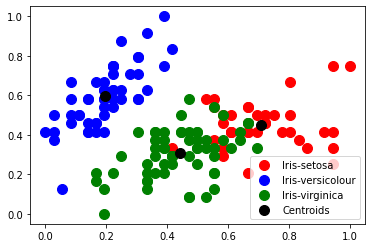

Silhouetter Score: 0.505
Calinski Harabasz Score: 359.845
Davies Bouldin Score: 0.760
--------- KMedoids ------------


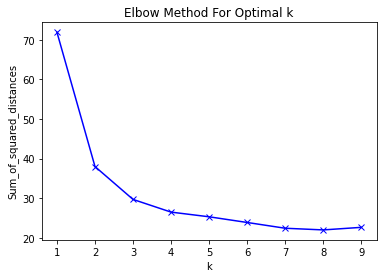

Metric :  manhattan
[[0.19444444 0.58333333 0.08474576 0.04166667]
 [0.36111111 0.29166667 0.54237288 0.5       ]
 [0.61111111 0.41666667 0.71186441 0.79166667]]


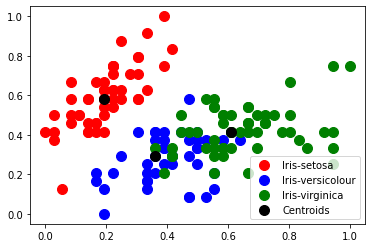

Silhouetter Score: 0.479
Calinski Harabasz Score: 345.912
Davies Bouldin Score: 0.776
Metric :  euclidean
[[0.19444444 0.58333333 0.08474576 0.04166667]
 [0.36111111 0.29166667 0.54237288 0.5       ]
 [0.61111111 0.41666667 0.71186441 0.79166667]]


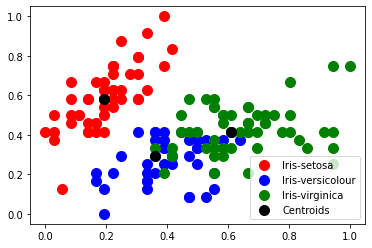

Silhouetter Score: 0.481
Calinski Harabasz Score: 347.078
Davies Bouldin Score: 0.768
Metric :  cosine
[[0.22222222 0.75       0.08474576 0.08333333]
 [0.61111111 0.41666667 0.81355932 0.875     ]
 [0.61111111 0.33333333 0.61016949 0.58333333]]


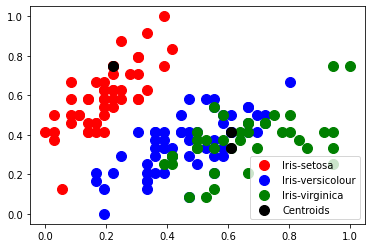

Silhouetter Score: 0.325
Calinski Harabasz Score: 199.016
Davies Bouldin Score: 1.918

--------------Dendrogram-------------


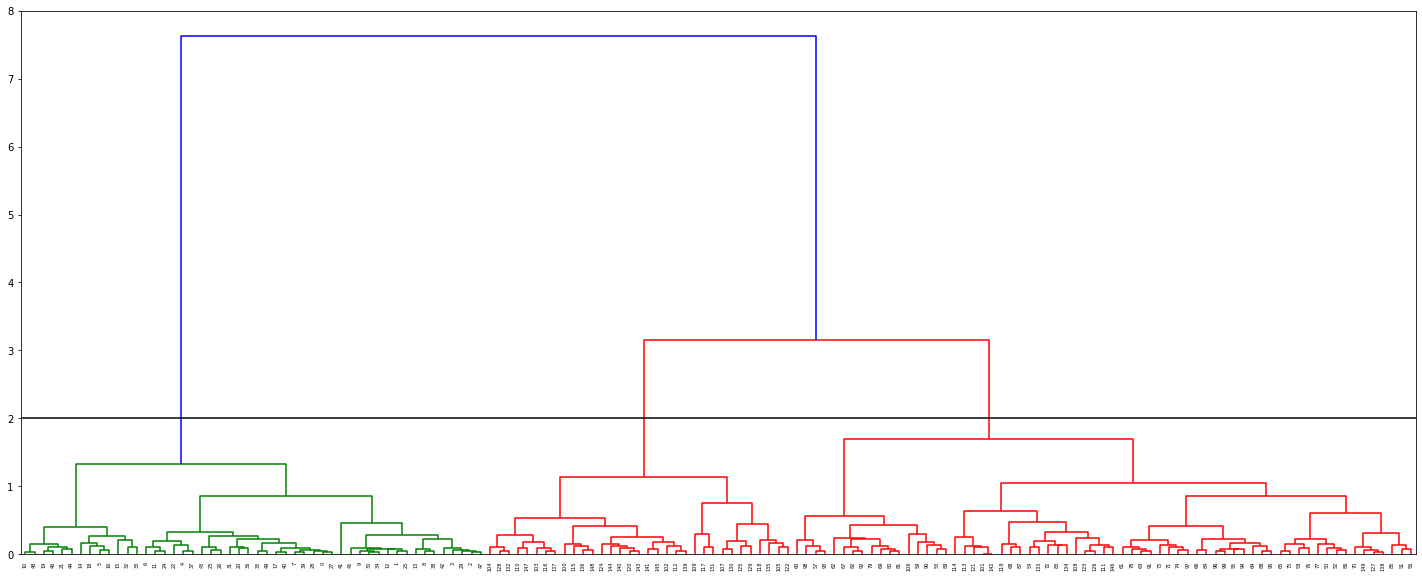

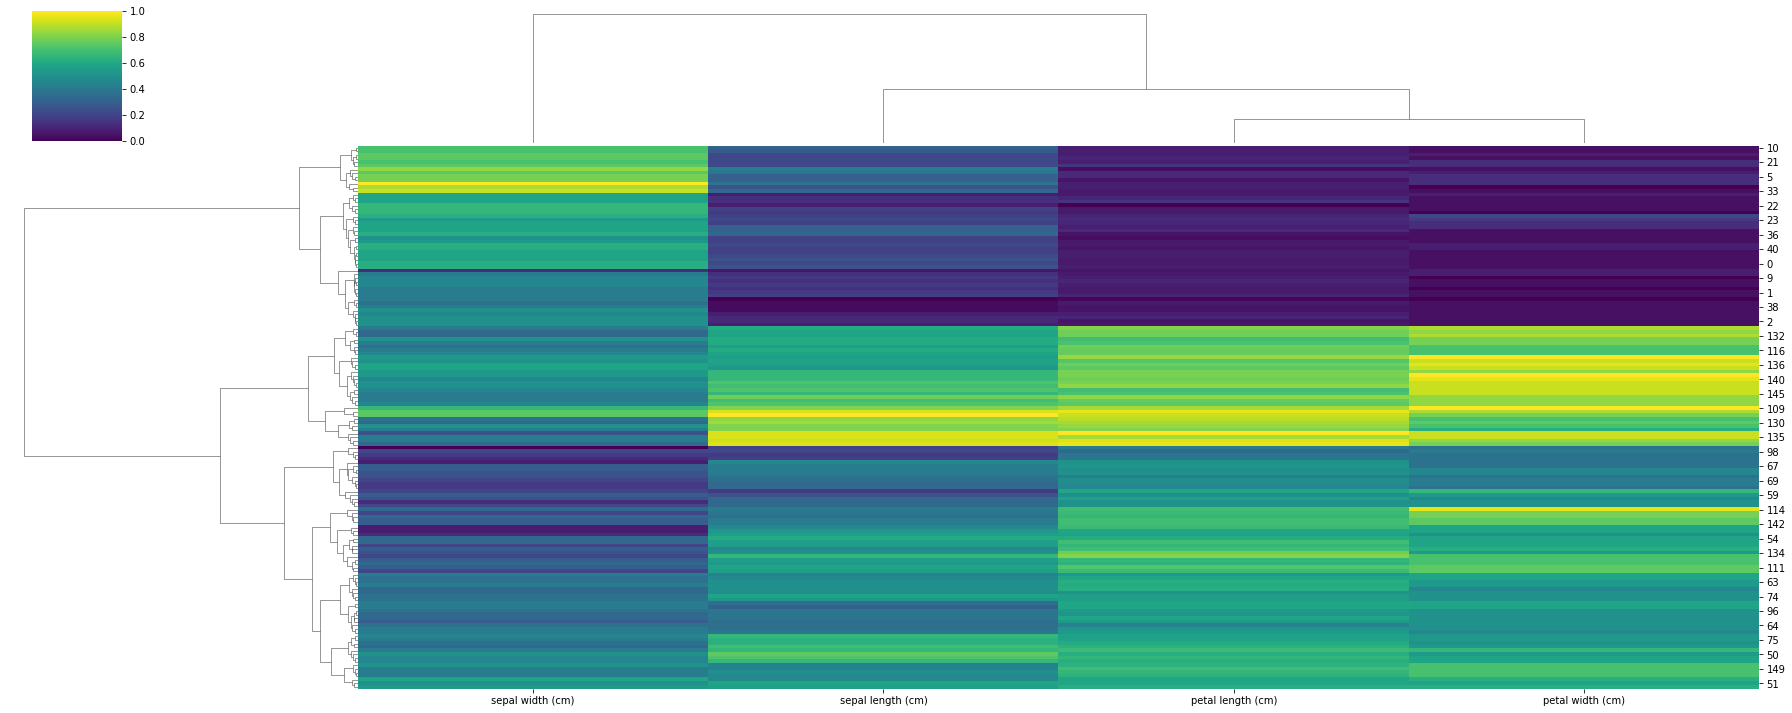


-------------------- AGNES --------------
Linkage: Ward
Silhouetter Score: 0.505
Calinski Harabasz Score: 349.254
Davies Bouldin Score: 0.748
Linkage: Complete
Silhouetter Score: 0.504
Calinski Harabasz Score: 350.401
Davies Bouldin Score: 0.751
Linkage: Average
Silhouetter Score: 0.505
Calinski Harabasz Score: 349.254
Davies Bouldin Score: 0.748

------------- Birch --------------
number of estimated clusters : 2
[[0.37083333 0.44618056 0.39152542 0.37222222]
 [0.66018519 0.41805556 0.77118644 0.80138889]]
Silhouetter Score: 0.439
Calinski Harabasz Score: 193.643
Davies Bouldin Score: 0.789

------------ DBSCAN -----------------
Estimated number of clusters: 2
Estimated number of noise points: 2
Silhouetter Score: 0.577
Calinski Harabasz Score: 164.681
Davies Bouldin Score: 2.954


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_birch.py:638: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (3). Decrease the threshold.
  


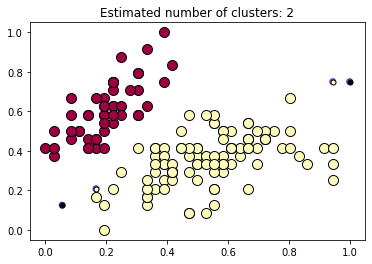


------------------ OPTICS --------------
Estimated number of clusters: 1
Estimated number of noise points: 51
Silhouetter Score: 0.625
Calinski Harabasz Score: 352.513
Davies Bouldin Score: 0.496


In [ ]:
iris=datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(iris_df.head())
mlRoutine(iris_df)

   alcohol  malic_acid   ash  ...   hue  od280/od315_of_diluted_wines  proline
0    14.23        1.71  2.43  ...  1.04                          3.92   1065.0
1    13.20        1.78  2.14  ...  1.05                          3.40   1050.0
2    13.16        2.36  2.67  ...  1.03                          3.17   1185.0
3    14.37        1.95  2.50  ...  0.86                          3.45   1480.0
4    13.24        2.59  2.87  ...  1.04                          2.93    735.0

[5 rows x 13 columns]
    alcohol  malic_acid  ...  od280/od315_of_diluted_wines   proline
0  0.842105    0.191700  ...                      0.970696  0.561341
1  0.571053    0.205534  ...                      0.780220  0.550642
2  0.560526    0.320158  ...                      0.695971  0.646933
3  0.878947    0.239130  ...                      0.798535  0.857347
4  0.581579    0.365613  ...                      0.608059  0.325963

[5 rows x 13 columns]
--------- KMeans --------------


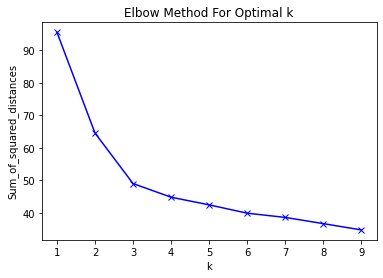

[[0.54668616 0.48440931 0.56159636 0.53865979 0.31521739 0.2467433
  0.10474293 0.61425577 0.22543521 0.48878144 0.18888889 0.15852666
  0.24911502]
 [0.70565142 0.24842869 0.58490401 0.3444313  0.41072701 0.64211419
  0.55467939 0.30034024 0.47727155 0.35534046 0.47780888 0.69038612
  0.59389397]
 [0.31336675 0.23561704 0.47304983 0.50024546 0.24551415 0.44805692
  0.38008171 0.41868823 0.39717591 0.14778699 0.47218996 0.58422001
  0.15637525]]


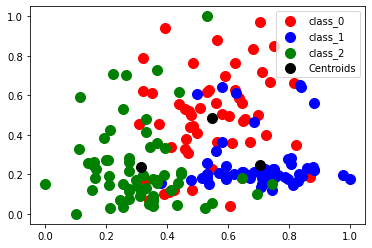

Silhouetter Score: 0.301
Calinski Harabasz Score: 83.374
Davies Bouldin Score: 1.305
--------- KMeans++ ------------


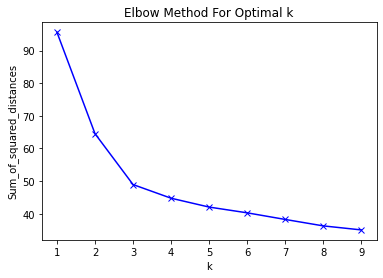

[[0.70565142 0.24842869 0.58490401 0.3444313  0.41072701 0.64211419
  0.55467939 0.30034024 0.47727155 0.35534046 0.47780888 0.69038612
  0.59389397]
 [0.54668616 0.48440931 0.56159636 0.53865979 0.31521739 0.2467433
  0.10474293 0.61425577 0.22543521 0.48878144 0.18888889 0.15852666
  0.24911502]
 [0.31336675 0.23561704 0.47304983 0.50024546 0.24551415 0.44805692
  0.38008171 0.41868823 0.39717591 0.14778699 0.47218996 0.58422001
  0.15637525]]


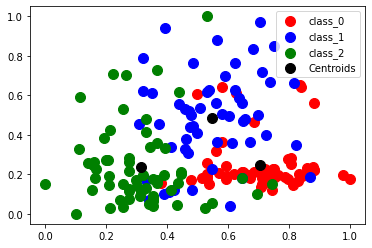

Silhouetter Score: 0.301
Calinski Harabasz Score: 83.374
Davies Bouldin Score: 1.305
--------- KMedoids ------------


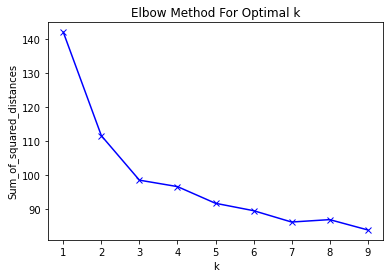

Metric :  manhattan
[[0.32105263 0.19565217 0.40641711 0.43298969 0.10869565 0.23103448
  0.35654008 0.45283019 0.38485804 0.18088737 0.42276423 0.6959707
  0.16547789]
 [0.60263158 0.49407115 0.54545455 0.56185567 0.23913043 0.32758621
  0.08860759 0.60377358 0.26498423 0.60921502 0.05691057 0.12820513
  0.26533524]
 [0.64473684 0.21146245 0.56149733 0.51030928 0.32608696 0.59310345
  0.55696203 0.24528302 0.45741325 0.32593857 0.45528455 0.80586081
  0.45791726]]


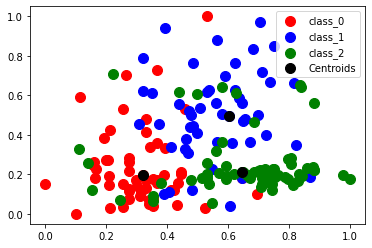

Silhouetter Score: 0.284
Calinski Harabasz Score: 78.841
Davies Bouldin Score: 1.355
Metric :  euclidean
[[0.60263158 0.49407115 0.54545455 0.56185567 0.23913043 0.32758621
  0.08860759 0.60377358 0.26498423 0.60921502 0.05691057 0.12820513
  0.26533524]
 [0.32105263 0.19565217 0.40641711 0.43298969 0.10869565 0.23103448
  0.35654008 0.45283019 0.38485804 0.18088737 0.42276423 0.6959707
  0.16547789]
 [0.64473684 0.21146245 0.56149733 0.51030928 0.32608696 0.59310345
  0.55696203 0.24528302 0.45741325 0.32593857 0.45528455 0.80586081
  0.45791726]]


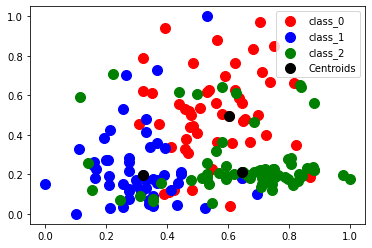

Silhouetter Score: 0.284
Calinski Harabasz Score: 79.874
Davies Bouldin Score: 1.338
Metric :  cosine
[[0.62368421 0.62648221 0.59893048 0.63917526 0.34782609 0.28275862
  0.08649789 0.56603774 0.31545741 0.51365188 0.17886179 0.10622711
  0.33666191]
 [0.64473684 0.21146245 0.56149733 0.51030928 0.32608696 0.59310345
  0.55696203 0.24528302 0.45741325 0.32593857 0.45528455 0.80586081
  0.45791726]
 [0.16052632 0.26086957 0.58823529 0.56701031 0.15217391 0.33448276
  0.28481013 0.66037736 0.29652997 0.12969283 0.42276423 0.54212454
  0.28673324]]


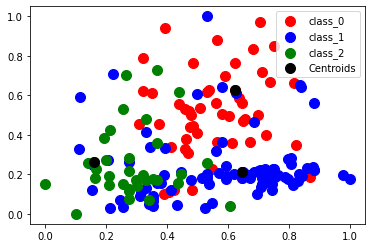

Silhouetter Score: 0.238
Calinski Harabasz Score: 64.676
Davies Bouldin Score: 1.467

--------------Dendrogram-------------


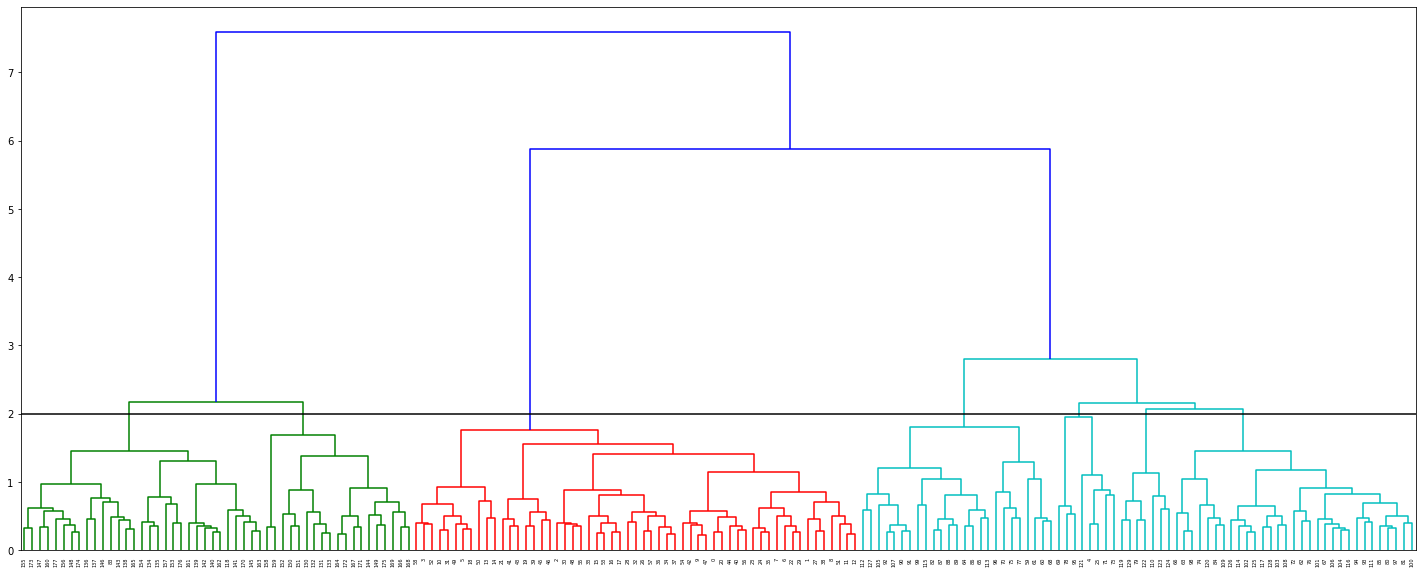

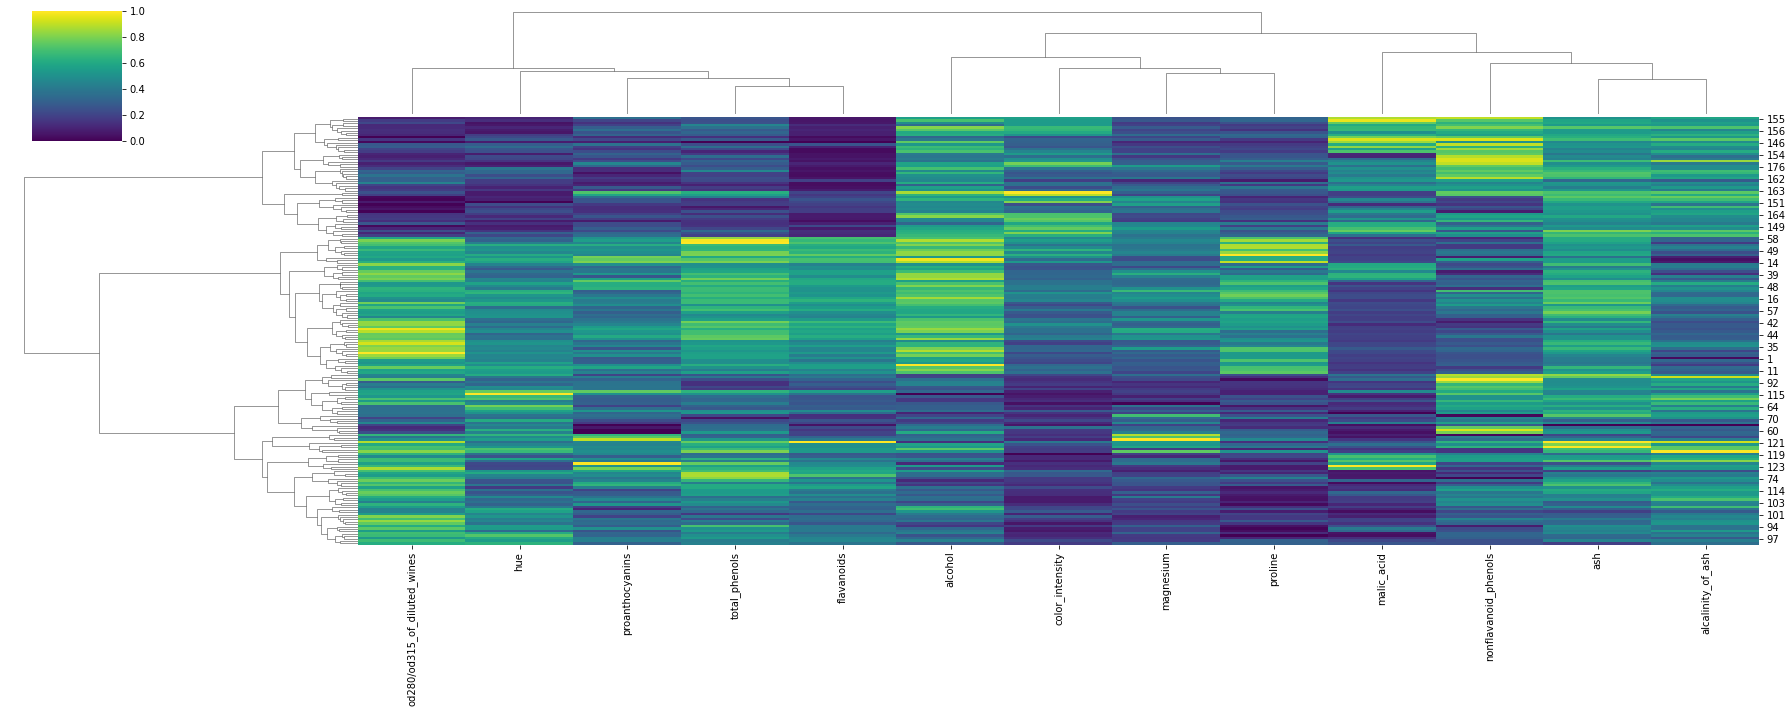


-------------------- AGNES --------------
Linkage: Ward
Silhouetter Score: 0.295
Calinski Harabasz Score: 81.328
Davies Bouldin Score: 1.318
Linkage: Complete
Silhouetter Score: 0.274
Calinski Harabasz Score: 73.937
Davies Bouldin Score: 1.360
Linkage: Average
Silhouetter Score: 0.136
Calinski Harabasz Score: 2.308
Davies Bouldin Score: 0.659

------------- Birch --------------
number of estimated clusters : 3
[[0.6943609  0.23900496 0.56616586 0.32564228 0.38267771 0.63678161
  0.54410287 0.30787661 0.45671223 0.35280893 0.47825526 0.67352753
  0.57100967]
 [0.32600619 0.15403395 0.47782321 0.4913584  0.25063939 0.34117647
  0.29827501 0.44284129 0.30246799 0.15822626 0.49655667 0.48383969
  0.1709113 ]
 [0.34385965 0.09749671 0.32442068 0.32302405 0.86594203 0.38045977
  0.30801688 0.26415094 0.76866456 0.14249147 0.55826558 0.51282051
  0.37351403]
 [0.50175439 0.13504611 0.62210339 0.75945017 0.42028986 0.76896552
  0.48312236 0.10062893 0.446898   0.17349261 0.60162602 0.73015873

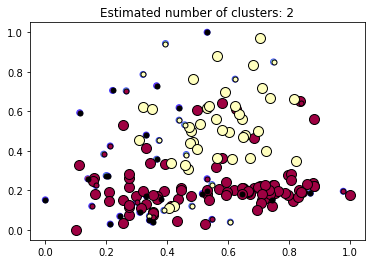


------------------ OPTICS --------------
Estimated number of clusters: 1
Estimated number of noise points: 172
Silhouetter Score: 0.049
Calinski Harabasz Score: 6.351
Davies Bouldin Score: 1.287


In [ ]:
wine=datasets.load_wine()
wine_df = pd.DataFrame(wine.data, columns = wine.feature_names)
print(wine_df.head())
mlRoutine(wine_df)